# EDA(Exploratory Data Analysis)_시각화 작업(1)

### 학습 목표
- EDA(Exploratory Data Analysis, 탐색적 데이터 분석)의 개념을 이해한다.
- EDA 내용 중 그래프 활용 시각화 분석에 필요한 함수를 실습을 통해 익힌다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터 불러오기
data = pd.read_excel('../Data/남북한발전전력량.xlsx')
data

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [3]:
# 필요한 데이터만 따로 정리하기
data = data.iloc[[0,5],2:]
data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [4]:
data.rename(index={0:'South', 5:'North'}, inplace=1)
data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, South to North
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    2 non-null      object
 1   1991    2 non-null      object
 2   1992    2 non-null      object
 3   1993    2 non-null      object
 4   1994    2 non-null      object
 5   1995    2 non-null      object
 6   1996    2 non-null      object
 7   1997    2 non-null      object
 8   1998    2 non-null      object
 9   1999    2 non-null      object
 10  2000    2 non-null      object
 11  2001    2 non-null      object
 12  2002    2 non-null      object
 13  2003    2 non-null      object
 14  2004    2 non-null      object
 15  2005    2 non-null      object
 16  2006    2 non-null      object
 17  2007    2 non-null      object
 18  2008    2 non-null      object
 19  2009    2 non-null      object
 20  2010    2 non-null      object
 21  2011    2 non-null      object
 22  2012    2 non-null      obj

In [6]:
# data.columns
data.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [7]:
# data['1991']

In [8]:
# 데이터 전체를 숫자로 변환하기
data = data.astype(dtype='int')
data.dtypes # attribute

1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
dtype: object

In [9]:
# 전체 기초통계량 구하기 --> describe()
data.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,677.000000,724.500000,778.500000,832.500000,940.500000,1038.500000,1134.000000,1218.500000,1161.500000,1289.500000,...,2133.500000,2239.500000,2285.50000,2492.000000,2590.000000,2655.500000,2696.000000,2718.000000,2735.500000,2821.500000
std,565.685425,652.659559,751.654508,864.791593,1003.384523,1143.391665,1302.490691,1450.276008,1402.192747,1560.584666,...,2683.470235,2806.506815,2899.84491,3189.051583,3364.414065,3451.388199,3500.178567,3538.362333,3599.880623,3652.206525
min,277.000000,263.000000,247.000000,221.000000,231.000000,230.000000,213.000000,193.000000,170.000000,186.000000,...,236.000000,255.000000,235.00000,237.000000,211.000000,215.000000,221.000000,216.000000,190.000000,239.000000
25%,477.000000,493.750000,512.750000,526.750000,585.750000,634.250000,673.500000,705.750000,665.750000,737.750000,...,1184.750000,1247.250000,1260.25000,1364.500000,1400.500000,1435.250000,1458.500000,1467.000000,1462.750000,1530.250000
50%,677.000000,724.500000,778.500000,832.500000,940.500000,1038.500000,1134.000000,1218.500000,1161.500000,1289.500000,...,2133.500000,2239.500000,2285.50000,2492.000000,2590.000000,2655.500000,2696.000000,2718.000000,2735.500000,2821.500000
75%,877.000000,955.250000,1044.250000,1138.250000,1295.250000,1442.750000,1594.500000,1731.250000,1657.250000,1841.250000,...,3082.250000,3231.750000,3310.75000,3619.500000,3779.500000,3875.750000,3933.500000,3969.000000,4008.250000,4112.750000
max,1077.000000,1186.000000,1310.000000,1444.000000,1650.000000,1847.000000,2055.000000,2244.000000,2153.000000,2393.000000,...,4031.000000,4224.000000,4336.00000,4747.000000,4969.000000,5096.000000,5171.000000,5220.000000,5281.000000,5404.000000


In [10]:
# column 자체를 숫자로 변환
data.columns.astype(dtype='int')
print(data.columns)
data.info()


Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, South to North
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    2 non-null      int64
 1   1991    2 non-null      int64
 2   1992    2 non-null      int64
 3   1993    2 non-null      int64
 4   1994    2 non-null      int64
 5   1995    2 non-null      int64
 6   1996    2 non-null      int64
 7   1997    2 non-null      int64
 8   1998    2 non-null      int64
 9   1999    2 non-null      int64
 10  2000    2 non-null      int64
 11  2001    2 non-null      int64
 12  2002    2 non-null      int64
 13  2003    2 non-null      int64
 14  2004    2 non-null      int64
 15  2005    2 non-null      int64
 16  2

## 그래프 시각화 작업
1. Pandas의 내장 함수 사용하기 --> plot()
2. Matplotlib, Seaborn과 같은 시각화 작업 전용 라이브러리 사용하기

### - Pandas 내장 그래프 함수
- 객체.plot()

<Axes: >

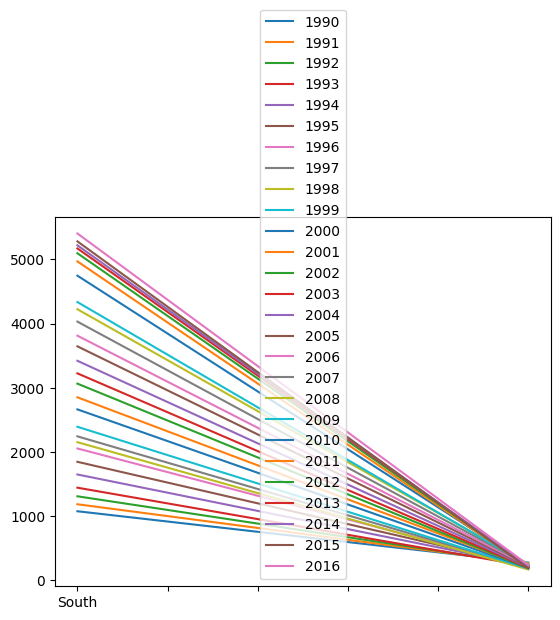

In [11]:
# 선그래프(default)

data.plot()

In [12]:
# 행과 열 전치 --> T
data.T

,South,North
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231
1995,1847,230
1996,2055,213
1997,2244,193
1998,2153,170
1999,2393,186


<Axes: >

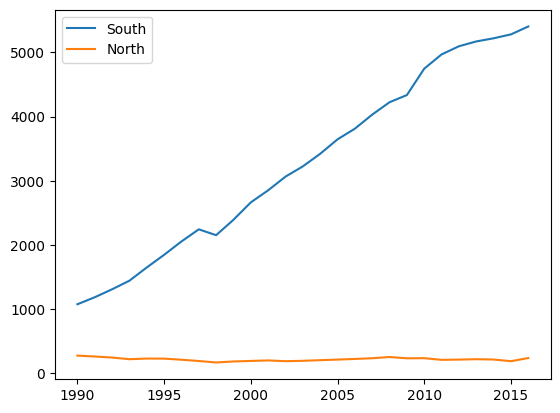

In [13]:

data.T.plot()

<Axes: >

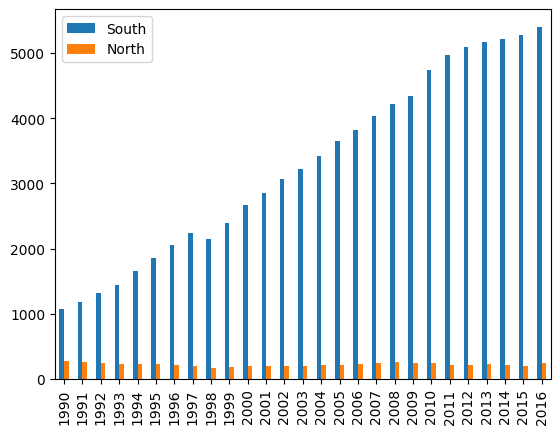

In [14]:
# bar
# data.T.plot.bar()
data.T.plot(kind='bar')

<Axes: ylabel='Frequency'>

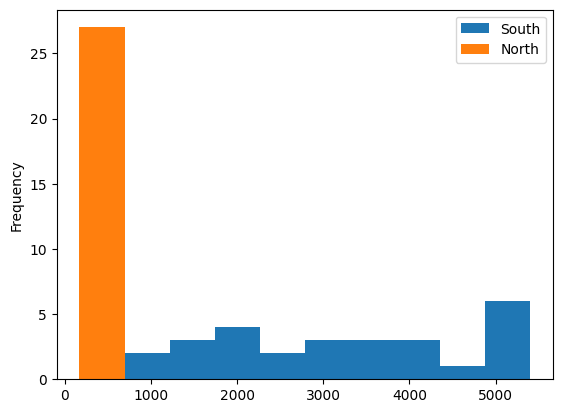

In [15]:
# histogram
data.T.plot(kind='hist')

### - Matplotlib 라이브러리 활용하기

In [16]:
# 라이브러리 셋팅
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# 데이터 불러오기
data = pd.read_excel('../Data/시도별 전출입 인구수.xlsx')
data.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [18]:
# 서울에서 다른 지역으로 이동한 데이터만 추출해 정리하기
data_seoul = data.fillna(method='ffill')
data_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [19]:
# 서울에서 다른 지역으로 이동한 데이터만 추출해 정리하기

data_seoul = data_seoul[data_seoul['전출지별'] == '서울특별시']
data_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [20]:
# 테이블 정리하기
data_seoul = data_seoul.drop('전출지별', axis=1)
data_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,2518286,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [21]:
data_seoul.rename(columns={'전입지별':'전입지'},inplace=True)
data_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,2518286,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [22]:
# data_seoul.reset_index(drop=True, inplace=True)
data_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,2518286,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


### - 서울에서 경기도로 전입한 인구 추이 그래프 작성하기

In [23]:
# '경기도' 전입 인구만 따로 가져오기
ingg = data_seoul.loc[28]
ingg = ingg.to_frame().reset_index()
print("info",ingg.info())
ingg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   49 non-null     object
 1   28      49 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes
info None


,index,28
0,전입지,경기도
1,1970,130149
2,1971,150313
3,1972,93333
4,1973,143234
5,1974,149045
6,1975,253705
7,1976,202276
8,1977,207722
9,1978,237684


In [24]:
# 컬럼명 변경
df = ingg.rename(columns={'index': '전입지', 28: '경기도'})

# 특정 행 제거
df = df.drop(0)
# 컬럼명 변경
df = df.rename(columns={'전입지': '전입년도', '경기도': '전입자수'})
df

,전입년도,전입자수
1,1970,130149
2,1971,150313
3,1972,93333
4,1973,143234
5,1974,149045
6,1975,253705
7,1976,202276
8,1977,207722
9,1978,237684
10,1979,278411


/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYL

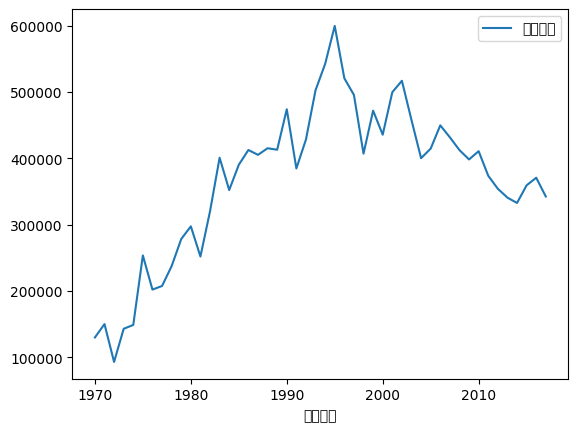

In [25]:
# 선그래프 그리기
import matplotlib.pyplot as plt

# 열 이름 수정
# '경기도' 대신 실제 열 이름을 사용하여 수정해야 합니다.
# 예를 들어, '전입지' 열을 x축으로 사용하고 '전입자수' 열을 y축으로 사용한다고 가정합니다.
ax = plt.gca()
df.plot(kind='line', x='전입년도', y='전입자수', ax=ax)

# 그래프 출력
plt.show()

/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arkwith/aSSIST/aSSIST_ML/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYL

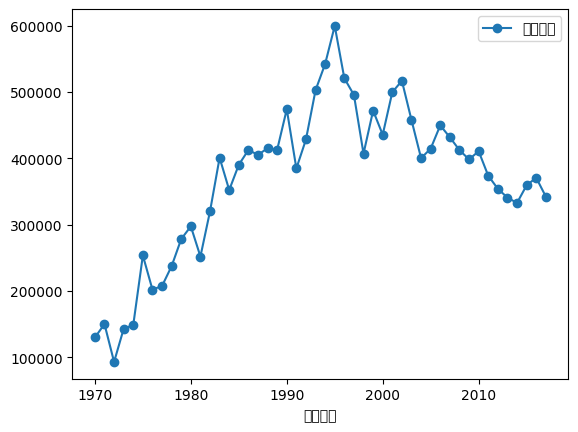

In [26]:
# 선 그래프에 꺾이는 부분에 점 추가
ax = df.plot(kind='line', x='전입년도', y='전입자수', marker='o')

# 그래프 출력
plt.show()

In [27]:
# matplotlib 한글 폰트 오류 문제 해결한 후 위의 cell 다시 실행

# from matplotlib import font_manager, rc
# font_path = 'c:/Windows/Fonts/malgun.ttf'
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family = font_name)

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'NanumGothic'

# plt.plot([-4, -3, -2, -1, 0, 1, 2, 3, 4], [12, 32, -4, 0, 5, 2, 19, 9, 3])
# plt.xlabel('x축')
# plt.ylabel('y축')
# plt.title('제목')
# plt.savefig('test.png')

In [30]:
plt.figure(figsize = (15,5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

### - 그래프 여러 개를 동시에 출력해 비교하기
- axe 객체 이용

/tmp/ipykernel_1156/885395401.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70, fontsize=8)
/tmp/ipykernel_1156/885395401.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)


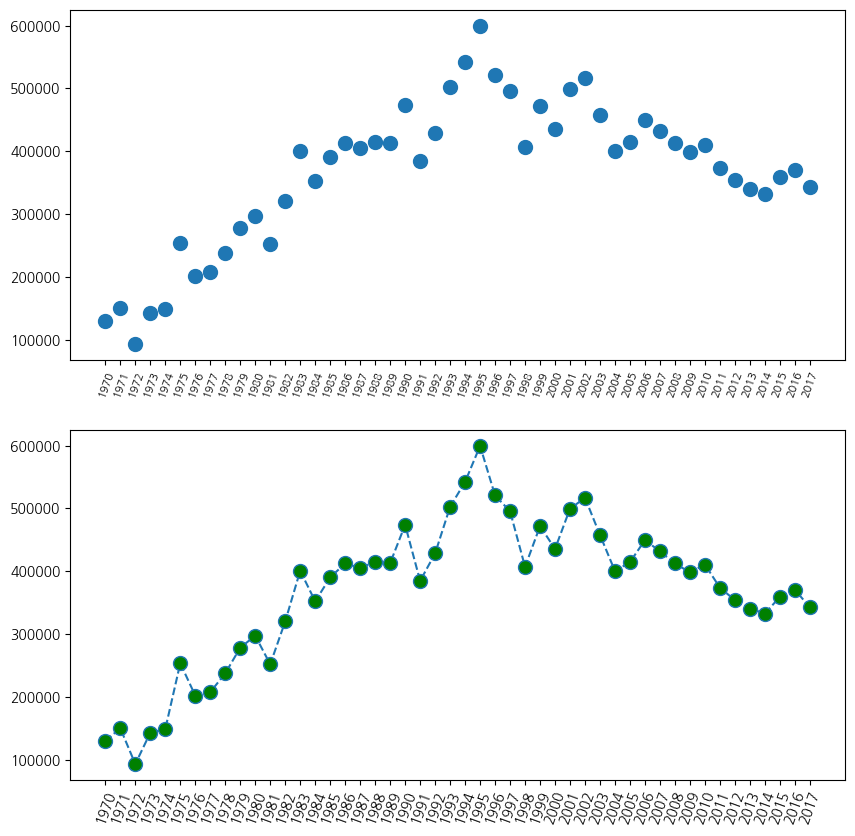

In [35]:
# 그래프 틀 생성
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(df['전입년도'], df['전입자수'], 'o', markersize=10)
ax2.plot(df['전입년도'], df['전입자수'],  'o--', markersize=10, markerfacecolor='g')

# x 축 레이블 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70, fontsize=8)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)

# 그래프 출력
plt.show()


### pandas DataFrame vs. Matplotlib
- 그래프 그리기
> pandas --> 객체.plot(), default가 line(선) 그래프, plot(kind = 'bar', 'hist' ...)
> matplotlib --> plt.plot(), 선 그래프 명령어, e.g) plt.bar(), plt.scatter()....

- matplotlib으로 그래프 그리기
> 여러개의 그래프 그리기
>> - 전체 틀 작성 --> fig = plt.figure(), ax1 = fig.add_subplot(좌표), ax2 = fig.add_subplot(좌표) ...
>> - 그래프 틀 작성 명령어(그래프 사이즈 포함) 제일 먼저 코딩 실행